# 📗 Linear Regression: Theory, Math & Intuition

---

## 1. What is Linear Regression?

Linear Regression is a **supervised learning** algorithm used to model the relationship between one or more **independent variables** (features) and a **dependent variable** (target) by fitting a **linear equation** to observed data.

---

## 2. The Model

For a dataset with features $x_1, x_2, \ldots, x_p$, the linear regression model predicts:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p
$$

Where:

- $\hat{y}$ is the predicted output,
- $\beta_0$ is the intercept (bias term),
- $\beta_i$ are the coefficients (weights) for each feature $x_i$.

For **simple linear regression** (one feature):

$$
\hat{y} = \beta_0 + \beta_1 x
$$

---

## 3. Intuition

- Linear regression tries to find the **best-fit line** (or hyperplane in multiple dimensions) that minimizes the distance between predicted points $\hat{y}$ and actual data points $y$.
- The goal is to minimize the **error** between predicted and true values.

---

## 4. The Loss Function: Mean Squared Error (MSE)

The most common objective is to minimize the **Mean Squared Error**:

$$
J(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2
$$

Where:

- $n$ is the number of samples,
- $y_i$ is the actual output for sample $i$,
- $\hat{y}_i$ is the predicted output for sample $i$.

---

## 5. Finding the Optimal Coefficients: Ordinary Least Squares (OLS)

To find the best $\boldsymbol{\beta} = (\beta_0, \beta_1, ..., \beta_p)$, we minimize $J(\boldsymbol{\beta})$.

- This is a **convex optimization problem** with a closed-form solution.
  
Using matrix notation:

- Let $\mathbf{X}$ be the $n \times (p+1)$ matrix of features, where the first column is all ones for $\beta_0$.
- Let $\mathbf{y}$ be the $n \times 1$ vector of targets.

The optimal $\boldsymbol{\hat{\beta}}$ is given by:

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

---

## 6. Geometric Interpretation

- Each feature vector $x_j$ forms a basis axis.
- The prediction $\hat{y}$ is the **projection** of $y$ onto the space spanned by the columns of $\mathbf{X}$.
- OLS finds the projection of $y$ onto the column space of $\mathbf{X}$ minimizing the perpendicular distance (residual error).

---

## 7. Assumptions of Linear Regression

1. **Linearity**: Relationship between features and target is linear.
2. **Independence**: Residuals (errors) are independent.
3. **Homoscedasticity**: Constant variance of errors.
4. **Normality**: Residuals are normally distributed (for inference).
5. **No multicollinearity**: Features are not highly correlated.

---

## 8. Python Visualization Example

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot data and fitted line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print learned coefficients
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.2f}")


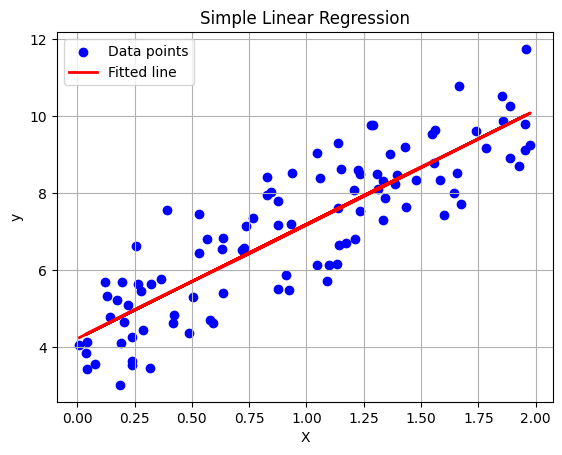

Intercept (β₀): 4.22
Coefficient (β₁): 2.97


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot data and fitted line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print learned coefficients
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.2f}")

Linear regression also has a non-closed form solution that is using gradient descent

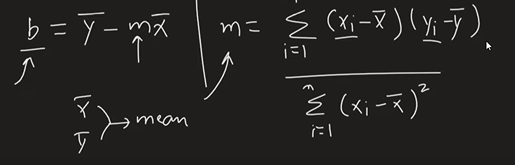

We don't use closed form solution, that is using ols method because as the no of dimensions increases more and more it becomes harder and computationally expensive to do it

We use MSE as our loss function and not absolute values using mod function is because in gradient descent we need to differentiate the loss function and absolute function is not differentiable at 0 but the mse function is differentiable everywhere

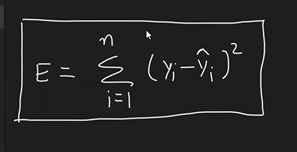
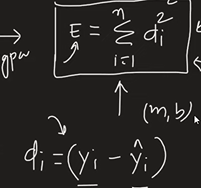

We need to find a line that minimises the value of E

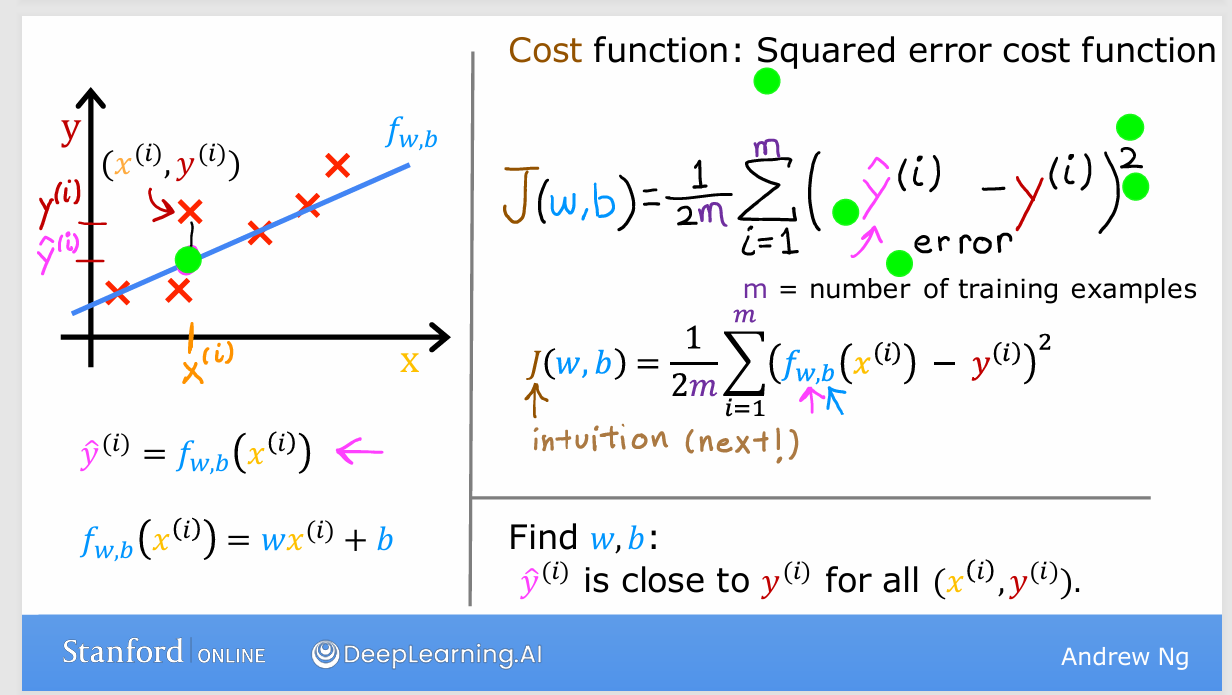

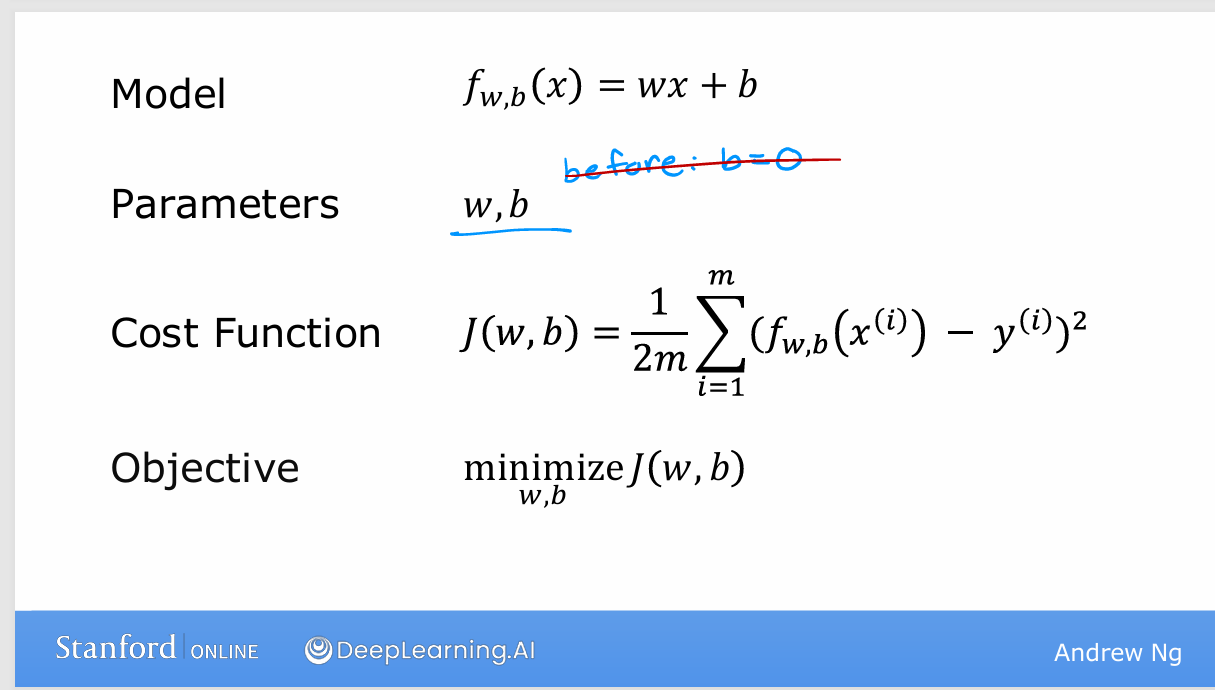

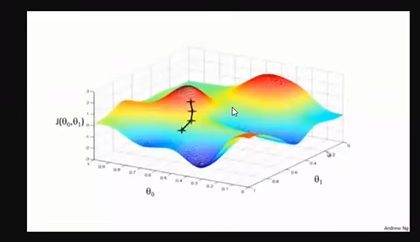

Plotting w,b and error in a 3d graph

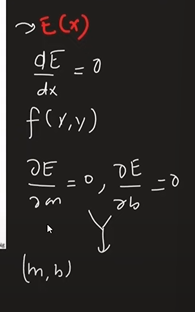

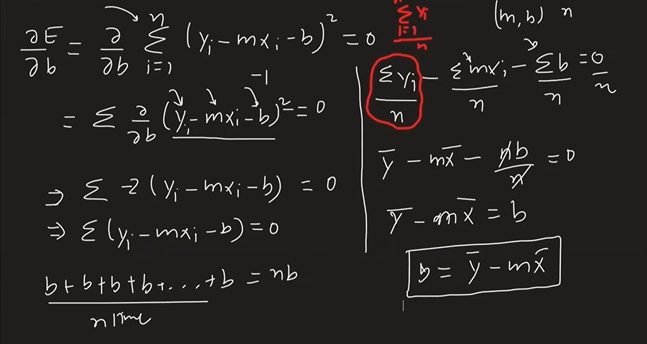

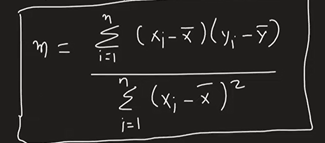

In [13]:
import numpy as np

class LR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train): 
        # Ensure inputs are flattened
        X_train = X_train.flatten()
        y_train = y_train.flatten()

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
            den += (X_train[i] - X_train.mean()) ** 2

        self.m = num / den
        self.b = y_train.mean() - (self.m * X_train.mean())

        print(f"m: {self.m}")
        print(f"b: {self.b}")

    def predict(self, X_test):
        X_test = X_test.flatten()
        return self.m * X_test + self.b


In [14]:
import numpy as np
import pandas as pd

In [15]:
df=pd.read_csv('placement.csv')

In [16]:
df.sample(3)

,cgpa,package
92,7.90,4.00
188,7.35,3.08
164,9.06,3.82


In [17]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [19]:
lr=LR()

In [20]:
lr.fit(X_train,y_train)

m: 0.5719466030803542
b: -0.9953084366404625


In [21]:
lr.predict(X_test)

array([3.4429972 , 3.16846283, 3.05979298, 3.07123191, 3.38580254,
       3.1913407 , 3.17990177, 3.70037317, 2.34485973, 4.48394002,
       3.63745905, 3.16846283, 2.888209  , 3.75756783, 2.37917652,
       2.70518609, 3.28285215, 1.74431579, 2.2304704 , 2.6022357 ,
       2.16755628, 3.64317851, 2.78525861, 2.49356584, 2.70518609,
       3.23709643, 2.99687885, 2.5336021 , 2.51644371, 2.86533113,
       3.52878919, 2.86533113, 3.52878919, 3.65461745, 2.5850773 ,
       3.63173958, 3.51735026, 3.07123191, 3.32860788, 2.67658876])